## Importing libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [98]:
pd.set_option("display.max_row",None)
pd.set_option("display.max_columns",None)

## Loading the data  And viewing the data

In [99]:
df=pd.read_csv("C:\\Users\\ritik\\Downloads\\vehicle_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [100]:
df.shape

(301, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<AxesSubplot:>

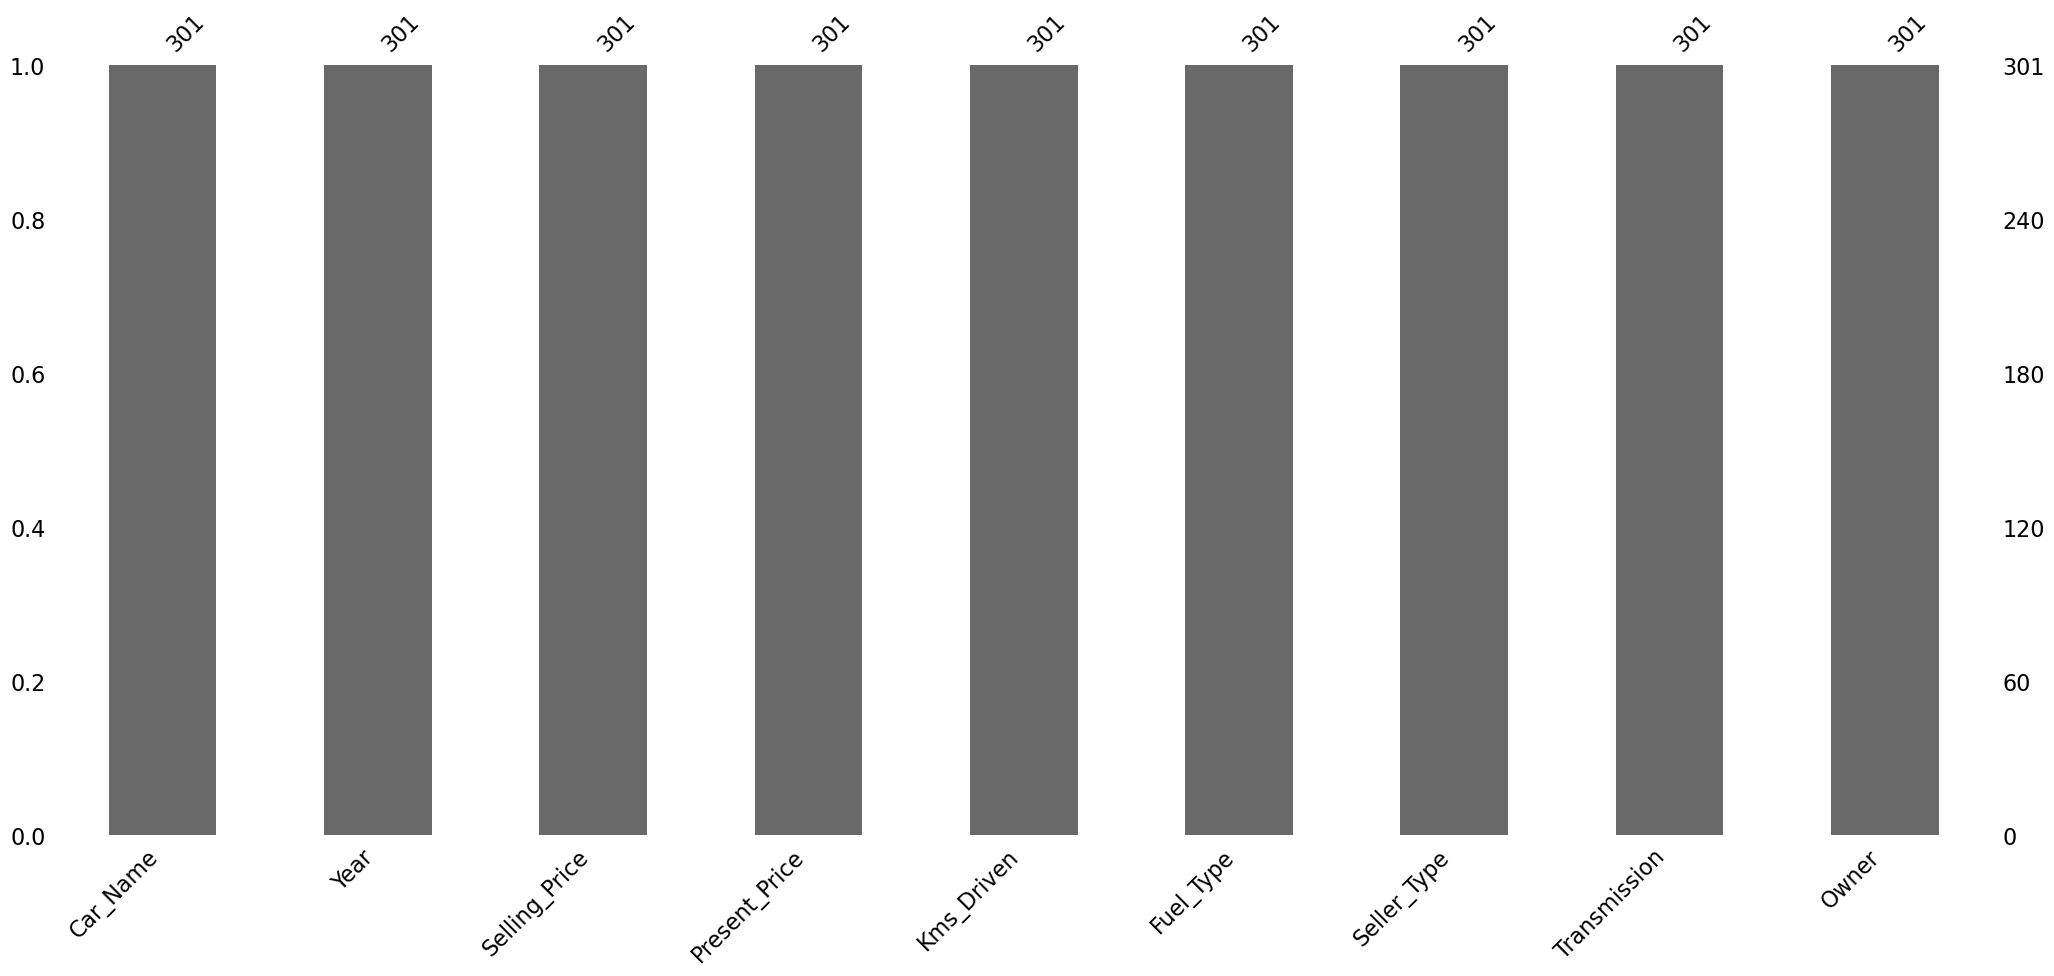

In [102]:
import missingno as mnso
mnso.bar(df)

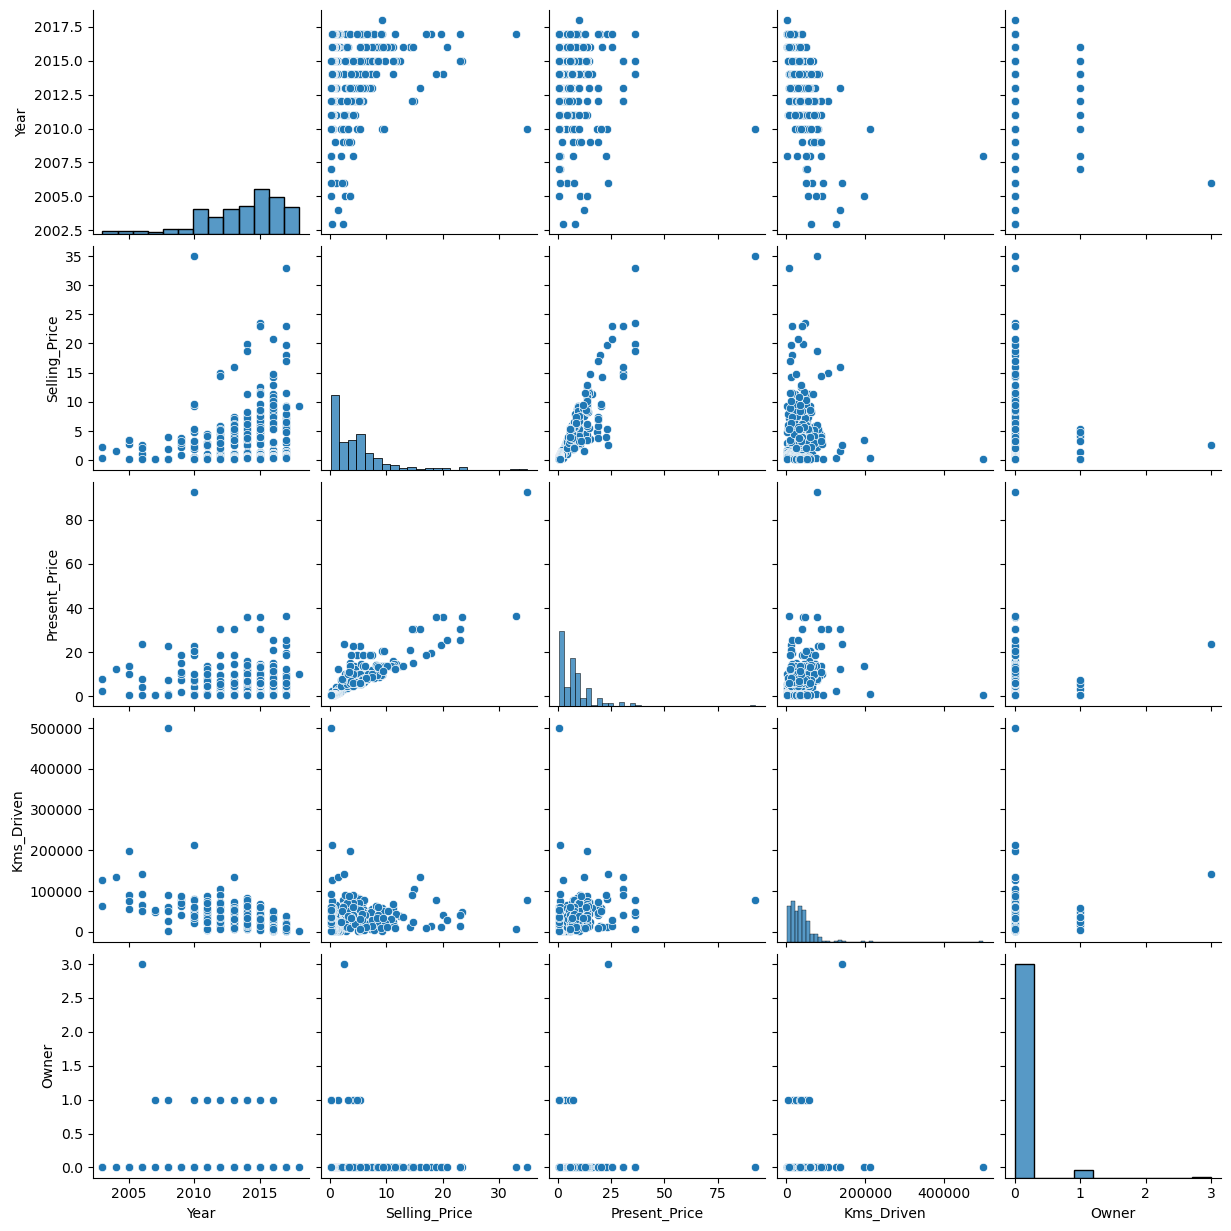

In [103]:
sns.pairplot(df)

In [104]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [105]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<AxesSubplot:>

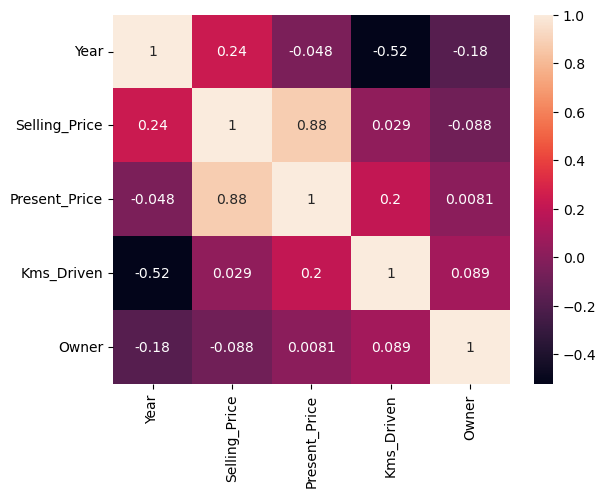

In [106]:
sns.heatmap(df.corr(),annot=True)

In [107]:
numeric=[int,float]


df_numeric=df.select_dtypes(include=numeric)
df_numeric


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.590,27000,0
1,2013,4.75,9.540,43000,0
2,2017,7.25,9.850,6900,0
3,2011,2.85,4.150,5200,0
4,2014,4.60,6.870,42450,0
5,2018,9.25,9.830,2071,0
6,2015,6.75,8.120,18796,0
7,2015,6.50,8.610,33429,0
8,2016,8.75,8.890,20273,0
9,2015,7.45,8.920,42367,0


In [108]:
df_numeric

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.590,27000,0
1,2013,4.75,9.540,43000,0
2,2017,7.25,9.850,6900,0
3,2011,2.85,4.150,5200,0
4,2014,4.60,6.870,42450,0
5,2018,9.25,9.830,2071,0
6,2015,6.75,8.120,18796,0
7,2015,6.50,8.610,33429,0
8,2016,8.75,8.890,20273,0
9,2015,7.45,8.920,42367,0


In [109]:
pos=df_numeric=df.select_dtypes(include=numeric)

In [110]:
plt.figure(figsize=(8,5))
for i in df_numeric:
    plt.subplot(2,3,pos)
    sns.distplot(df_numeric[i])
    plt.title(i)
    pos=pos+1


ValueError: num must be 1 <= num <= 6, not      Year  Selling_Price  Present_Price  Kms_Driven  Owner
0    2014           3.35          5.590       27000      0
1    2013           4.75          9.540       43000      0
2    2017           7.25          9.850        6900      0
3    2011           2.85          4.150        5200      0
4    2014           4.60          6.870       42450      0
5    2018           9.25          9.830        2071      0
6    2015           6.75          8.120       18796      0
7    2015           6.50          8.610       33429      0
8    2016           8.75          8.890       20273      0
9    2015           7.45          8.920       42367      0
10   2017           2.85          3.600        2135      0
11   2015           6.85         10.380       51000      0
12   2015           7.50          9.940       15000      0
13   2015           6.10          7.710       26000      0
14   2009           2.25          7.210       77427      0
15   2016           7.75         10.790       43000      0
16   2015           7.25         10.790       41678      0
17   2016           7.75         10.790       43000      0
18   2015           3.25          5.090       35500      0
19   2010           2.65          7.980       41442      0
20   2016           2.85          3.950       25000      0
21   2017           4.90          5.710        2400      0
22   2011           4.40          8.010       50000      0
23   2014           2.50          3.460       45280      0
24   2013           2.90          4.410       56879      0
25   2011           3.00          4.990       20000      0
26   2013           4.15          5.870       55138      0
27   2017           6.00          6.490       16200      0
28   2010           1.95          3.950       44542      0
29   2015           7.45         10.380       45000      0
30   2012           3.10          5.980       51439      0
31   2011           2.35          4.890       54200      0
32   2014           4.95          7.490       39000      0
33   2014           6.00          9.950       45000      0
34   2014           5.50          8.060       45000      0
35   2011           2.95          7.740       49998      0
36   2015           4.65          7.200       48767      0
37   2003           0.35          2.280      127000      0
38   2016           3.00          3.760       10079      0
39   2003           2.25          7.980       62000      0
40   2016           5.85          7.870       24524      0
41   2014           2.55          3.980       46706      0
42   2008           1.95          7.150       58000      0
43   2014           5.50          8.060       45780      0
44   2012           1.25          2.690       50000      0
45   2014           7.50         12.040       15000      0
46   2013           2.65          4.890       64532      0
47   2006           1.05          4.150       65000      0
48   2015           5.80          7.710       25870      0
49   2017           7.75          9.290       37000      0
50   2012          14.90         30.610      104707      0
51   2015          23.00         30.610       40000      0
52   2017          18.00         19.770       15000      0
53   2013          16.00         30.610      135000      0
54   2005           2.75         10.210       90000      0
55   2009           3.60         15.040       70000      0
56   2015           4.50          7.270       40534      0
57   2010           4.75         18.540       50000      0
58   2014           4.10          6.800       39485      1
59   2014          19.99         35.960       41000      0
60   2013           6.95         18.610       40001      0
61   2015           4.50          7.700       40588      0
62   2014          18.75         35.960       78000      0
63   2015          23.50         35.960       47000      0
64   2017          33.00         36.230        6000      0
65   2014           4.75          6.950       45000      0
66   2017          19.75         23.150       11000      0
67   2010           9.25         20.450       59000      0
68   2011           4.35         13.740       88000      0
69   2016          14.25         20.910       12000      0
70   2014           3.95          6.760       71000      0
71   2011           4.50         12.480       45000      0
72   2013           7.45         18.610       56001      0
73   2011           2.65          5.710       43000      0
74   2014           4.90          8.930       83000      0
75   2015           3.95          6.800       36000      0
76   2013           5.50         14.680       72000      0
77   2004           1.50         12.350      135154      0
78   2010           5.25         22.830       80000      0
79   2012          14.50         30.610       89000      0
80   2016          14.73         14.890       23000      0
81   2015           4.75          7.850       40000      0
82   2017          23.00         25.390       15000      0
83   2015          12.50         13.460       38000      0
84   2005           3.49         13.460      197176      0
85   2006           2.50         23.730      142000      3
86   2010          35.00         92.600       78000      0
87   2012           5.90         13.740       56000      0
88   2013           3.45          6.050       47000      0
89   2014           4.75          6.760       40000      0
90   2009           3.80         18.610       62000      0
91   2014          11.25         16.090       58242      0
92   2005           3.51         13.700       75000      0
93   2015          23.00         30.610       40000      0
94   2008           4.00         22.780       89000      0
95   2012           5.85         18.610       72000      0
96   2016          20.75         25.390       29000      0
97   2017          17.00         18.640        8700      0
98   2013           7.05         18.610       45000      0
99   2010           9.65         20.450       50024      0
100  2016           1.75          1.900        3000      0
101  2017           1.70          1.820        1400      0
102  2017           1.65          1.780        4000      0
103  2017           1.45          1.600        1200      0
104  2017           1.35          1.470        4100      0
105  2015           1.35          2.370       21700      0
106  2014           1.35          3.450       16500      1
107  2013           1.25          1.500       15000      0
108  2016           1.20          1.500       18000      0
109  2017           1.20          1.470       11000      0
110  2016           1.20          1.780        6000      0
111  2016           1.15          1.500        8700      0
112  2014           1.15          2.400        7000      0
113  2016           1.15          1.400       35000      0
114  2015           1.15          1.470       17000      0
115  2015           1.11          1.470       17500      0
116  2013           1.10          1.470       33000      0
117  2015           1.10          1.900       14000      0
118  2015           1.10          1.470       26000      0
119  2013           1.05          1.900        5400      0
120  2016           1.05          1.260        5700      0
121  2011           1.05          1.500        6900      0
122  2016           1.05          1.170        6000      0
123  2013           1.00          1.470       46500      0
124  2012           0.95          1.750       11500      0
125  2009           0.90          1.750       40000      0
126  2017           0.90          0.950        1300      0
127  2016           0.75          0.800        7000      0
128  2017           0.80          0.870        3000      0
129  2017           0.78          0.840        5000      0
130  2017           0.75          0.870       11000      0
131  2015           0.75          0.820       18000      0
132  2017           0.75          0.950        3500      0
133  2016           0.72          0.950         500      0
134  2017           0.65          0.810       11800      0
135  2015           0.65          0.740        5000      0
136  2014           0.65          1.200       23500      0
137  2013           0.65          0.787       16000      0
138  2016           0.60          0.870       15000      0
139  2015           0.60          0.950       16600      0
140  2013           0.60          1.200       32000      0
141  2016           0.60          0.800       20000      0
142  2015           0.60          0.840       29000      0
143  2016           0.60          0.840       25000      0
144  2014           0.60          0.990       25000      0
145  2012           0.60          0.810       19000      0
146  2014           0.55          0.787       15000      0
147  2015           0.55          0.840       58000      0
148  2010           0.52          0.940       45000      0
149  2016           0.51          0.940       24000      0
150  2011           0.50          0.826        6000      0
151  2016           0.50          0.550       31000      0
152  2012           0.50          0.990       13000      0
153  2013           0.50          0.990       45000      0
154  2014           0.50          0.880        8000      0
155  2017           0.48          0.510        4300      0
156  2017           0.48          0.520       15000      0
157  2015           0.48          0.840       23000      0
158  2017           0.48          0.540        8600      0
159  2017           0.45          0.510        4000      0
160  2011           0.45          0.950       24000      0
161  2014           0.45          0.826       23000      0
162  2012           0.45          0.990       14500      0
163  2010           0.45          0.950       27000      0
164  2016           0.45          0.540       14000      0
165  2016           0.45          0.540         500      0
166  2016           0.45          0.550        1000      0
167  2014           0.42          0.810       42000      0
168  2013           0.42          0.730       12000      0
169  2015           0.40          0.540       14000      0
170  2012           0.40          0.830        5500      0
171  2015           0.40          0.550        6700      0
172  2014           0.40          0.640       13700      0
173  2017           0.40          0.510        1300      0
174  2015           0.38          0.720       38600      0
175  2011           0.38          0.787       75000      0
176  2011           0.35          1.050       30000      0
177  2016           0.35          0.570       24000      0
178  2014           0.35          0.520       19000      0
179  2010           0.31          1.050      213000      0
180  2012           0.30          0.510       60000      0
181  2016           0.30          0.480       50000      0
182  2013           0.30          0.580       30000      0
183  2013           0.27          0.470       21000      0
184  2008           0.25          0.750       26000      1
185  2008           0.25          0.580        1900      0
186  2010           0.25          0.520       22000      0
187  2013           0.25          0.510       32000      0
188  2013           0.25          0.570       18000      0
189  2005           0.20          0.570       55000      0
190  2008           0.20          0.750       60000      0
191  2012           0.20          0.570       25000      1
192  2007           0.20          0.750       49000      1
193  2013           0.20          0.650       24000      1
194  2008           0.20          0.787       50000      0
195  2015           0.18          0.320       35000      0
196  2008           0.17          0.520      500000      0
197  2010           0.16          0.510       33000      0
198  2011           0.15          0.570       35000      1
199  2007           0.12          0.580       53000      0
200  2006           0.10          0.750       92233      0
201  2010           3.25          6.790       58000      1
202  2015           4.40          5.700       28200      0
203  2011           2.95          4.600       53460      0
204  2015           2.75          4.430       28282      0
205  2016           5.25          5.700        3493      1
206  2017           5.75          7.130       12479      0
207  2015           5.15          5.700       34797      0
208  2017           7.90          8.100        3435      0
209  2015           4.85          5.700       21125      0
210  2012           3.10          4.600       35775      0
211  2015          11.75         14.790       43535      0
212  2016          11.25         13.600       22671      0
213  2011           2.90          6.790       31604      0
214  2017           5.25          5.700       20114      0
215  2012           4.50          9.400       36100      0
216  2016           2.90          4.430       12500      0
217  2016           3.15          4.430       15000      0
218  2014           6.45          9.400       45078      0
219  2012           4.50          9.400       36000      0
220  2017           3.50          4.430       38488      0
221  2013           4.50          6.790       32000      0
222  2014           6.00          7.600       77632      0
223  2015           8.25          9.400       61381      0
224  2013           5.11          9.400       36198      0
225  2011           2.70          4.600       22517      0
226  2015           5.25          5.700       24678      0
227  2011           2.55          4.430       57000      0
228  2012           4.95          9.400       60000      0
229  2012           3.10          6.790       52132      0
230  2013           6.15          9.400       45000      0
231  2017           9.25          9.400       15001      0
232  2015          11.45         14.790       12900      0
233  2013           3.90          5.700       53000      0
234  2015           5.50          5.700        4492      0
235  2017           9.10          9.400       15141      0
236  2016           3.10          4.430       11849      0
237  2015          11.25         13.600       68000      0
238  2013           4.80          9.400       60241      0
239  2012           2.00          4.430       23709      0
240  2012           5.35          9.400       32322      0
241  2015           4.75          7.130       35866      1
242  2014           4.40          7.130       34000      0
243  2016           6.25          7.600        7000      0
244  2013           5.95          9.400       49000      0
245  2012           5.20          9.400       71000      0
246  2012           3.75          6.790       35000      0
247  2015           5.95          9.400       36000      0
248  2013           4.00          4.600       30000      0
249  2016           5.25          7.600       17000      0
250  2016          12.90         13.600       35934      0
251  2013           5.00          9.900       56701      0
252  2015           5.40          6.820       31427      0
253  2014           7.20          9.900       48000      0
254  2013           5.25          9.900       54242      0
255  2012           3.00          5.350       53675      0
256  2016          10.25         13.600       49562      0
257  2015           8.50         13.600       40324      0
258  2015           8.40         13.600       25000      0
259  2014           3.90          7.000       36054      0
260  2016           9.15         13.600       29223      0
261  2016           5.50          5.970        5600      0
262  2015           4.00          5.800       40023      0
263  2016           6.60          7.700       16002      0
264  2015           4.00          7.000       40026      0
265  2017           6.50          8.700       21200      0
266  2014           3.65          7.000       35000      0
267  2016           8.35          9.400       19434      0
268  2017           4.80          5.800       19000      0
269  2015           6.70         10.000       18828      0
270  2011           4.10         10.000       69341      0
271  2009           3.00         10.000       69562      0
272  2015           7.50         10.000       27600      0
273  2010           2.25          7.500       61203      0
274  2014           5.30          6.800       16500      0
275  2016          10.90         13.600       30753      0
276  2015           8.65         13.600       24800      0
277  2015           9.70         13.600       21780      0
278  2016           6.00          8.400        4000      0
279  2014           6.25         13.600       40126      0
280  2015           5.25          5.900       14465      0
281  2006           2.10          7.600       50456      0
282  2014           8.25         14.000       63000      0
283  2016           8.99         11.800        9010      0
284  2013           3.50          5.900        9800      0
285  2016           7.40          8.500       15059      0
286  2016           5.65          7.900       28569      0
287  2015           5.75          7.500       44000      0
288  2015           8.40         13.600       34000      0
289  2016          10.11         13.600       10980      0
290  2014           4.50          6.400       19000      0
291  2015           5.40          6.100       31427      0
292  2016           6.40          8.400       12000      0
293  2010           3.25          9.900       38000      0
294  2014           3.75          6.800       33019      0
295  2015           8.55         13.090       60076      0
296  2016           9.50         11.600       33988      0
297  2015           4.00          5.900       60000      0
298  2009           3.35         11.000       87934      0
299  2017          11.50         12.500        9000      0
300  2016           5.30          5.900        5464      0

<Figure size 800x500 with 0 Axes>

In [111]:
df_numeric.skew()

Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

In [112]:
df["age"]=2023-df["Year"]
df.drop(columns=["Year"],inplace=True)

In [113]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [114]:
for i in df.select_dtypes(include="object"):
    print(df[i].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [115]:
df1=pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"])

In [116]:
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,3.35,5.59,27000,0,9,0,0,1,1,0,0,1
1,sx4,4.75,9.54,43000,0,10,0,1,0,1,0,0,1
2,ciaz,7.25,9.85,6900,0,6,0,0,1,1,0,0,1
3,wagon r,2.85,4.15,5200,0,12,0,0,1,1,0,0,1
4,swift,4.60,6.87,42450,0,9,0,1,0,1,0,0,1


In [117]:
df1=pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"],drop_first=True)

In [118]:
df1.head() 

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,9,0,1,0,1
1,sx4,4.75,9.54,43000,0,10,1,0,0,1
2,ciaz,7.25,9.85,6900,0,6,0,1,0,1
3,wagon r,2.85,4.15,5200,0,12,0,1,0,1
4,swift,4.60,6.87,42450,0,9,1,0,0,1


In [119]:
df2=df1.groupby(["Car_Name"])["Selling_Price"].agg(["mean"]).reset_index()
df2

,Car_Name,mean
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
5,Bajaj Avenger 150 street,0.600000
6,Bajaj Avenger 220,0.790000
7,Bajaj Avenger 220 dtsi,0.525000
8,Bajaj Avenger Street 220,0.450000
9,Bajaj Discover 100,0.270000


In [120]:
l=[]
for i in df1["Car_Name"]:
    for j,k in df2.iterrows():
        if i==k["Car_Name"]:
            l.append(k["mean"])

In [121]:
df1["Car_Name"]=l

In [122]:
df1

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2.862500,3.35,5.590,27000,0,9,0,1,0,1
1,3.158333,4.75,9.540,43000,0,10,1,0,0,1
2,7.472222,7.25,9.850,6900,0,6,0,1,0,1
3,2.512500,2.85,4.150,5200,0,12,0,1,0,1
4,4.540000,4.60,6.870,42450,0,9,1,0,0,1
5,9.250000,9.25,9.830,2071,0,5,1,0,0,1
6,7.472222,6.75,8.120,18796,0,8,0,1,0,1
7,6.500000,6.50,8.610,33429,0,8,1,0,0,1
8,7.472222,8.75,8.890,20273,0,7,1,0,0,1
9,7.472222,7.45,8.920,42367,0,8,1,0,0,1


In [123]:
x=df1.drop(columns=["Selling_Price"])
y=df1["Selling_Price"]

In [124]:
st=StandardScaler()
x_scaled=st.fit_transform(x)
x_scaled

array([[-0.39671534, -0.23621461, -0.25622446, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [-0.33147079,  0.22150462,  0.1559105 , ..., -1.96337432,
        -0.73728539,  0.39148015],
       [ 0.61993571,  0.25742689, -0.77396901, ...,  0.50932723,
        -0.73728539,  0.39148015],
       ...,
       [ 0.60824871,  0.39068691,  1.31334003, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [ 0.60824871,  0.56450434, -0.7198763 , ..., -1.96337432,
        -0.73728539,  0.39148015],
       [ 0.01846057, -0.20029235, -0.81095812, ...,  0.50932723,
        -0.73728539,  0.39148015]])

## Spilit the data into train and test

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20)

## Checking the shape of the train and test

In [126]:
print(x_train.shape)
print(y_train.shape)

(240, 9)
(240,)


In [127]:
print(x_test.shape)
print(y_test.shape)

(61, 9)
(61,)


## Model Creation

In [128]:
lr=LinearRegression()

In [129]:
lr.fit(x_train,y_train)  # training data

LinearRegression()

In [130]:
lr.coef_

array([ 1.2725824 ,  3.63701887, -0.21829226, -0.18112388, -1.1386465 ,
        0.46669822,  0.07237182, -0.08309397, -0.182519  ])

In [131]:
lr.intercept_

4.757707477164505

## Model Evaluation

In [132]:
## EVALUATION

In [133]:
y_pred=lr.predict(x_test)


In [134]:
r2_score(y_test,y_pred)

0.7865146042661109

In [135]:
y_pred_train=lr.predict(x_train)

In [136]:
r2_score(y_train,y_pred_train)

0.8993532861134576

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [137]:
lr=LinearRegression()

In [138]:
cv =KFold(n_splits=3,random_state=1,shuffle=True)
scores = cross_val_score(lr,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
np.mean(scores)

0.8571637607865528